In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline



In [2]:
#loading the data

train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')
sample = pd.read_csv('SampleSubmission (1).csv')

In [3]:
test.head()

,ID_LAT_LON_YEAR_WEEK,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,...,Cloud_cloud_top_pressure,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle
0,ID_-23.53_27.47_2019_1,-23.53,27.47,2019,1,0.000077,0.454468,0.000034,0.114291,-80.286309,...,74897.052000,2180.266538,81287.074479,1562.031017,10.734123,0.280660,-31.230174,33.337966,-93.217261,23.358251
1,ID_-23.53_27.47_2019_2,-23.53,27.47,2019,2,0.000181,0.423171,0.000062,0.075100,-17.765690,...,84222.653521,982.619057,90307.650011,927.111222,5.250020,0.238933,66.490898,58.137794,-85.001467,13.416481
2,ID_-23.53_27.47_2019_3,-23.53,27.47,2019,3,0.000059,0.713085,0.000043,0.114210,16.725653,...,78922.490786,1582.964934,85383.151853,1006.778109,6.819371,0.258681,75.923186,41.336951,-83.267543,16.273000
3,ID_-23.53_27.47_2019_4,-23.53,27.47,2019,4,0.000483,0.434454,0.000171,0.131394,-22.475340,...,61135.919587,3935.419981,67490.031362,3428.423528,6.233628,0.281542,-11.023230,60.689869,-77.763718,22.793961
4,ID_-23.53_27.47_2019_5,-23.53,27.47,2019,5,0.000193,0.783044,0.000141,0.161142,4.750356,...,78494.247391,1647.538526,84478.743043,1122.534093,11.810251,0.281564,-13.294513,51.007132,-76.620646,23.198242


In [4]:
sample.head()

,ID_LAT_LON_YEAR_WEEK,emission
0,ID_-23.53_27.47_2019_1,0
1,ID_-23.53_27.47_2019_2,0
2,ID_-23.53_27.47_2019_3,0
3,ID_-23.53_27.47_2019_4,0
4,ID_-23.53_27.47_2019_5,0


In [5]:
train.shape, test.shape

((74005, 76), (28085, 75))

In [6]:
train

,ID_LAT_LON_YEAR_WEEK,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,...,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle,emission
0,ID_-23.73_28.77_2019_1,-23.73,28.77,2019,1,0.000167,0.713172,0.000102,0.223929,24.939440,...,5566.222019,54826.032616,4606.209995,19.115282,0.353778,24.951948,49.053953,-89.638032,17.988874,86.051700
1,ID_-23.73_28.77_2019_2,-23.73,28.77,2019,2,-0.000155,0.812910,-0.000137,0.080281,16.624162,...,3711.511365,68491.753342,3034.461661,12.218664,0.244987,4.708856,42.586683,-89.904314,22.773246,88.875670
2,ID_-23.73_28.77_2019_3,-23.73,28.77,2019,3,-0.000065,0.860306,-0.000062,0.161050,-13.237244,...,2136.385189,78967.739548,1433.482587,6.062737,0.245102,76.060628,34.737544,-83.595254,17.437300,91.723114
3,ID_-23.73_28.77_2019_4,-23.73,28.77,2019,4,0.000152,0.422284,0.000087,0.046504,-13.534653,...,3841.853018,64592.806769,2878.512917,6.388233,0.210904,75.912368,60.294490,-71.896728,11.977818,92.883870
4,ID_-23.73_28.77_2019_5,-23.73,28.77,2019,5,0.000024,1.004578,0.000028,0.214246,-13.475718,...,1295.688171,86804.025391,1094.665344,9.206252,0.261103,-13.346079,50.194493,-77.462082,24.374270,94.878330
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74000,ID_-33.93_25.67_2022_45,-33.93,25.67,2022,45,0.001192,0.322510,0.000358,0.113889,-95.875226,...,6380.936608,54160.486756,5380.936607,32.711150,0.088256,-22.750184,51.561352,-67.067758,35.438041,34.115240
74001,ID_-33.93_25.67_2022_46,-33.93,25.67,2022,46,0.000196,0.393484,0.000081,0.095715,-104.357543,...,6080.303261,56345.002370,5080.302846,5.022155,0.030810,-21.652201,57.599384,-69.915866,33.520840,35.865158
74002,ID_-33.93_25.67_2022_47,-33.93,25.67,2022,47,0.000114,0.445499,0.000054,0.007275,76.966014,...,1478.970433,95206.933265,517.846957,4.096226,0.080515,-94.985989,62.034106,-83.159080,42.204499,35.511803
74003,ID_-33.93_25.67_2022_48,-33.93,25.67,2022,48,0.000092,0.377850,0.000035,0.077744,-12.476655,...,1722.604370,88203.562500,1166.031128,9.418262,0.113354,-105.555237,57.863998,-83.368256,39.928902,35.907146


In [7]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
latitude,74005.0,-27.829723,2.760589,-33.930000,-29.630000,-28.130000,-25.730000,-2.373000e+01
longitude,74005.0,27.782742,2.746672,21.070000,26.670000,28.770000,29.470000,3.117000e+01
year,74005.0,2020.478049,1.111261,2019.000000,2019.000000,2020.000000,2021.000000,2.022000e+03
week_no,74005.0,26.156098,14.843840,1.000000,13.000000,26.000000,39.000000,5.200000e+01
SulphurDioxide_SO2_column_number_density,72075.0,0.000263,0.000599,-0.000989,-0.000066,0.000147,0.000441,9.526132e-03
...,...,...,...,...,...,...,...,...
Cloud_sensor_azimuth_angle,71281.0,-14.277119,47.277321,-125.298058,-31.952090,-13.738030,3.790391,1.274832e+02
Cloud_sensor_zenith_angle,71281.0,49.567836,12.097417,0.100882,41.329129,53.233031,59.478133,6.656461e+01
Cloud_solar_azimuth_angle,71281.0,-50.513220,20.623907,-97.570906,-67.987723,-45.413921,-33.124961,-1.417002e+01
Cloud_solar_zenith_angle,71281.0,40.558959,12.201179,10.906227,29.786592,40.117572,51.445698,6.960511e+01


In [8]:
train.isnull().sum()

ID_LAT_LON_YEAR_WEEK             0
latitude                         0
longitude                        0
year                             0
week_no                          0
                              ... 
Cloud_sensor_azimuth_angle    2724
Cloud_sensor_zenith_angle     2724
Cloud_solar_azimuth_angle     2724
Cloud_solar_zenith_angle      2724
emission                         0
Length: 76, dtype: int64

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74005 entries, 0 to 74004
Data columns (total 76 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   ID_LAT_LON_YEAR_WEEK                                      74005 non-null  object 
 1   latitude                                                  74005 non-null  float64
 2   longitude                                                 74005 non-null  float64
 3   year                                                      74005 non-null  int64  
 4   week_no                                                   74005 non-null  int64  
 5   SulphurDioxide_SO2_column_number_density                  72075 non-null  float64
 6   SulphurDioxide_SO2_column_number_density_amf              72075 non-null  float64
 7   SulphurDioxide_SO2_slant_column_number_density            72075 non-null  float64
 8   SulphurDioxide_c

In [10]:
train.corr()

,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,SulphurDioxide_sensor_zenith_angle,...,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle,emission
latitude,1.000000e+00,3.442131e-02,9.680280e-13,-4.120727e-16,-0.013411,0.245585,0.034086,0.077487,-0.179399,-0.104894,...,0.124527,-0.183576,0.135973,-0.120517,-0.035432,0.018726,-0.099441,-0.119393,-0.186953,0.043716
longitude,3.442131e-02,1.000000e+00,5.525050e-13,1.669710e-15,0.048207,-0.086206,0.030376,0.085387,0.011298,-0.065482,...,-0.139216,0.175833,-0.159226,0.139100,-0.176402,0.062182,-0.015777,0.009609,-0.023972,0.053942
year,9.680280e-13,5.525050e-13,1.000000e+00,-3.173069e-02,0.024867,0.044522,0.023370,-0.133865,0.086833,-0.040092,...,0.237660,-0.156829,0.166093,0.028153,-0.182743,0.117793,-0.186650,0.041395,-0.034717,0.000353
week_no,-4.120727e-16,1.669710e-15,-3.173069e-02,1.000000e+00,0.010255,-0.089630,0.019620,-0.042108,0.009638,0.045885,...,0.134137,-0.103391,0.121689,0.056620,-0.226638,-0.027515,-0.005385,-0.229539,0.023374,0.003154
SulphurDioxide_SO2_column_number_density,-1.341079e-02,4.820710e-02,2.486663e-02,1.025494e-02,1.000000,-0.334201,0.899666,0.011074,0.114785,0.145190,...,-0.068004,0.068076,-0.065316,-0.127814,-0.189000,0.046620,0.078432,0.260619,0.293373,0.060201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Cloud_sensor_azimuth_angle,1.872603e-02,6.218204e-02,1.177926e-01,-2.751509e-02,0.046620,-0.023932,0.032671,0.112449,0.045410,0.018439,...,0.144339,-0.128829,0.116944,-0.053805,-0.076880,1.000000,0.061465,0.286412,-0.195486,0.003708
Cloud_sensor_zenith_angle,-9.944077e-02,-1.577686e-02,-1.866498e-01,-5.385432e-03,0.078432,-0.118096,0.054232,0.172600,0.098585,0.265069,...,-0.180255,0.170546,-0.159180,-0.044011,0.030073,0.061465,1.000000,0.149087,0.128211,-0.006091
Cloud_solar_azimuth_angle,-1.193930e-01,9.609400e-03,4.139473e-02,-2.295395e-01,0.260619,-0.575282,0.174025,-0.006380,0.136812,0.059016,...,-0.199272,0.207159,-0.206900,-0.311534,-0.397155,0.286412,0.149087,1.000000,0.770490,0.008474
Cloud_solar_zenith_angle,-1.869526e-01,-2.397170e-02,-3.471671e-02,2.337431e-02,0.293373,-0.650537,0.194133,-0.075698,0.216793,0.077931,...,-0.258226,0.269004,-0.249246,-0.286273,-0.423031,-0.195486,0.128211,0.770490,1.000000,0.003812


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='emission'>

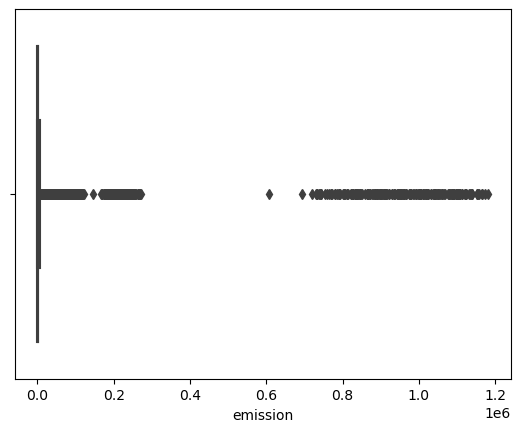

In [11]:
sns.boxplot('emission', data = train)

Text(0.5, 1.0, 'COUNTPLOT SHOWING REPRESENTATION OF VARIOUS WEEKS IN THE TRAIN DATA')

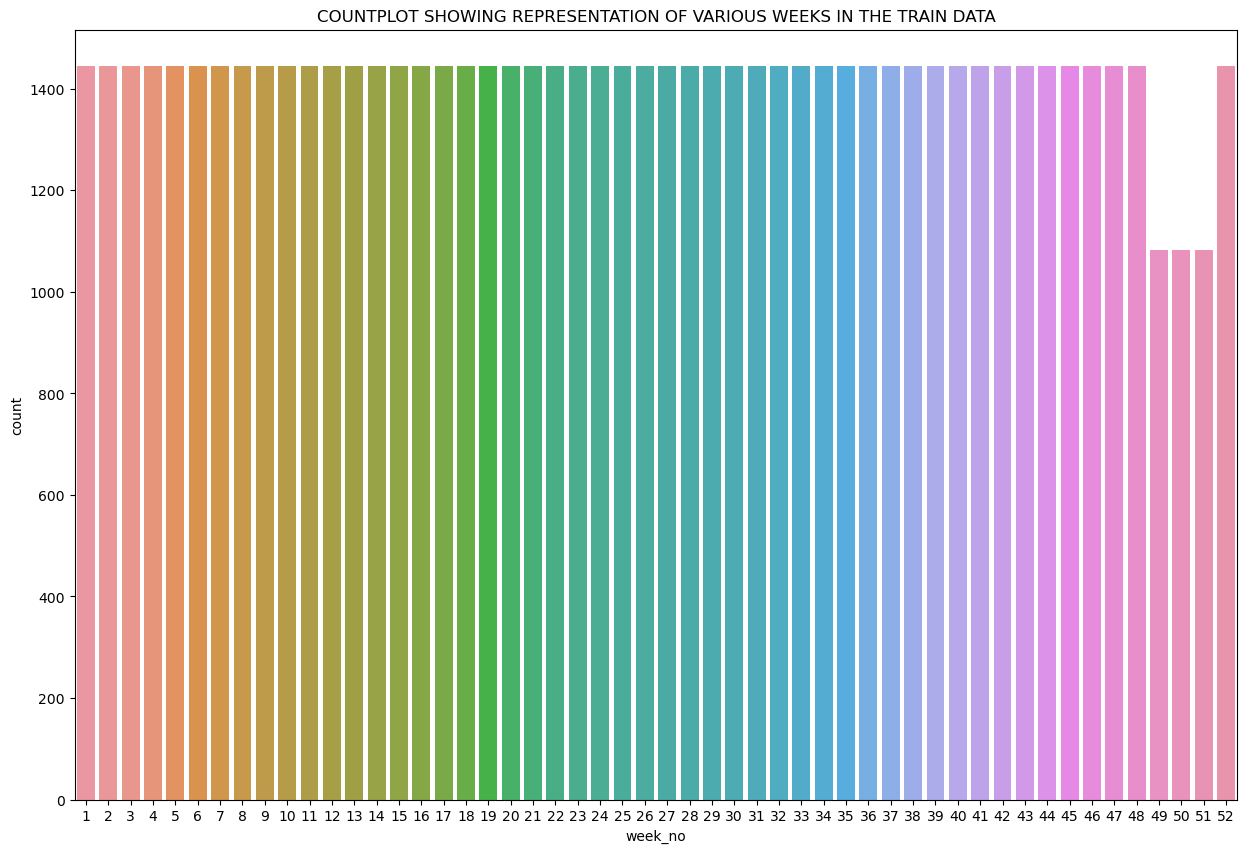

In [12]:
plt.figure(figsize = (15,10))
sns.countplot(x=train['week_no'])
plt.title('COUNTPLOT SHOWING REPRESENTATION OF VARIOUS WEEKS IN THE TRAIN DATA')

<AxesSubplot:xlabel='Count', ylabel='emission'>

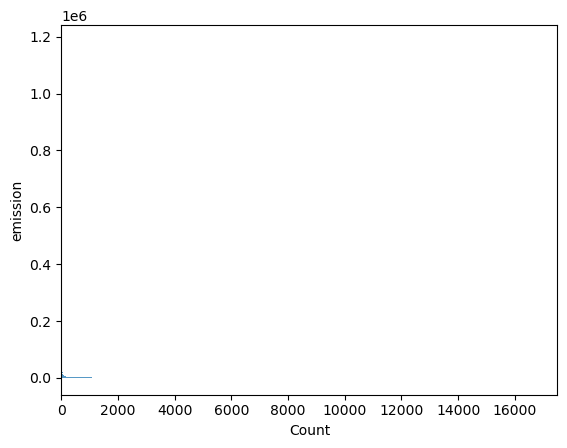

In [13]:
sns.histplot(y= 'emission', data = train)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='emission', ylabel='Density'>

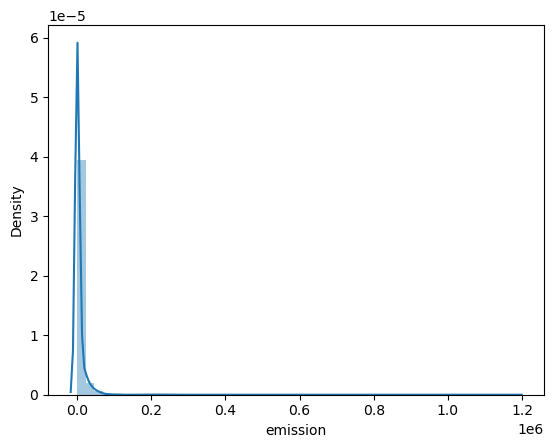

In [14]:
sns.distplot(train.emission)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='emission', ylabel='Density'>

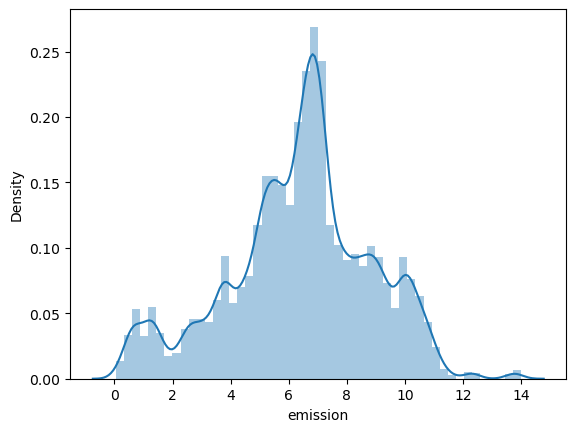

In [15]:
#resesrch on logg transformation

sns.distplot(np.log1p(train['emission']))


17.038027449698163
LOG TRANSFROMATION:  0        4.454948
1        4.487238
2        4.518774
3        4.531350
4        4.552595
           ...   
74000    3.529744
74001    3.579766
74002    3.569865
74003    3.580936
74004    3.362403
Name: emission, Length: 74005, dtype: float64


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='emission', ylabel='Density'>

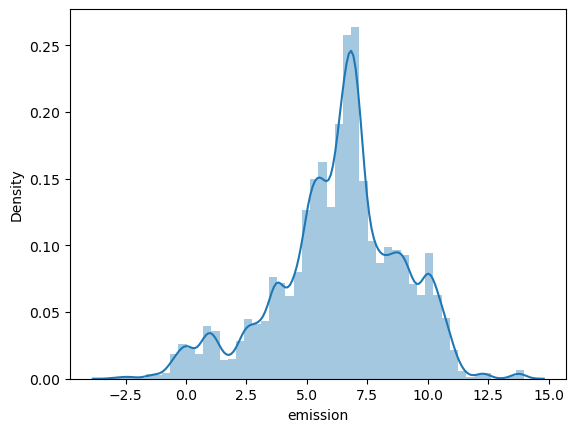

In [16]:
print(train['emission'].skew())
print('LOG TRANSFROMATION: ', np.log(train['emission']))
sns.distplot(np.log(train['emission']))

In [17]:
train.year.value_counts()

2019    18772
2020    18772
2021    18772
2022    17689
Name: year, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='year', ylabel='count'>

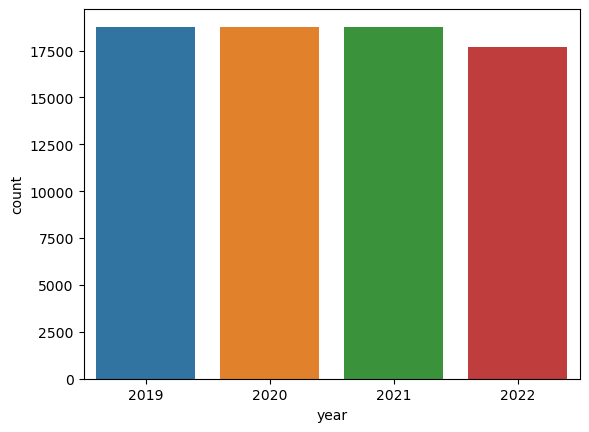

In [18]:
sns.countplot(train['year'])

In [19]:
#check for duplicates
train.duplicated(), test.duplicated

(0        False
 1        False
 2        False
 3        False
 4        False
          ...  
 74000    False
 74001    False
 74002    False
 74003    False
 74004    False
 Length: 74005, dtype: bool,
 <bound method DataFrame.duplicated of           ID_LAT_LON_YEAR_WEEK  latitude  longitude  year  week_no  \
 0       ID_-23.53_27.47_2019_1    -23.53      27.47  2019        1   
 1       ID_-23.53_27.47_2019_2    -23.53      27.47  2019        2   
 2       ID_-23.53_27.47_2019_3    -23.53      27.47  2019        3   
 3       ID_-23.53_27.47_2019_4    -23.53      27.47  2019        4   
 4       ID_-23.53_27.47_2019_5    -23.53      27.47  2019        5   
 ...                        ...       ...        ...   ...      ...   
 28080  ID_-34.03_18.87_2022_45    -34.03      18.87  2022       45   
 28081  ID_-34.03_18.87_2022_46    -34.03      18.87  2022       46   
 28082  ID_-34.03_18.87_2022_47    -34.03      18.87  2022       47   
 28083  ID_-34.03_18.87_2022_48    -34.03      

In [20]:
#filling in null values
train = train.ffill()
test = test.ffill()


In [21]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74005 entries, 0 to 74004
Data columns (total 76 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   ID_LAT_LON_YEAR_WEEK                                      74005 non-null  object 
 1   latitude                                                  74005 non-null  float64
 2   longitude                                                 74005 non-null  float64
 3   year                                                      74005 non-null  int64  
 4   week_no                                                   74005 non-null  int64  
 5   SulphurDioxide_SO2_column_number_density                  74005 non-null  float64
 6   SulphurDioxide_SO2_column_number_density_amf              74005 non-null  float64
 7   SulphurDioxide_SO2_slant_column_number_density            74005 non-null  float64
 8   SulphurDioxide_c

In [22]:
train.dropna(inplace= True, axis=1)
test.dropna(inplace= True, axis=1)

In [23]:
import lightgbm as lgb
from catboost import CatBoostRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
import lightgbm as lgb

X = train.drop(['ID_LAT_LON_YEAR_WEEK', 'emission'], axis=1)
y = np.log1p(train['emission'])

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.4)

model = lgb.LGBMRegressor(random_state = 0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(f'RSME: {np.sqrt(mean_squared_error(y_test, y_pred))}')
print(f'R2 SCORE: {r2_score(y_test, y_pred)}')

RSME: 0.5468848234025366
R2 SCORE: 0.9511502441962706


In [39]:
preds = model.predict(test[X.columns])

In [40]:
submm = pd.DataFrame({'ID_LAT_LON_YEAR_WEEK': test['ID_LAT_LON_YEAR_WEEK'], 'emission': preds})

In [41]:
submm.head()

,ID_LAT_LON_YEAR_WEEK,emission
0,ID_-23.53_27.47_2019_1,5.700354
1,ID_-23.53_27.47_2019_2,5.970081
2,ID_-23.53_27.47_2019_3,5.975504
3,ID_-23.53_27.47_2019_4,6.563395
4,ID_-23.53_27.47_2019_5,5.884039


In [42]:
submm.describe()

,emission
count,28085.000000
mean,6.733867
std,0.748585
min,5.184161
25%,6.109152
50%,6.883769
75%,7.259155
max,9.364296


In [43]:
submm.to_csv('CO2 EMISSION MODEL PREDICTION', index=False)

In [44]:
pd.read_csv('CO2 EMISSION MODEL PREDICTION')

,ID_LAT_LON_YEAR_WEEK,emission
0,ID_-23.53_27.47_2019_1,5.700354
1,ID_-23.53_27.47_2019_2,5.970081
2,ID_-23.53_27.47_2019_3,5.975504
3,ID_-23.53_27.47_2019_4,6.563395
4,ID_-23.53_27.47_2019_5,5.884039
...,...,...
28080,ID_-34.03_18.87_2022_45,5.463921
28081,ID_-34.03_18.87_2022_46,5.469965
28082,ID_-34.03_18.87_2022_47,5.463598
28083,ID_-34.03_18.87_2022_48,5.460178
